In [1]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

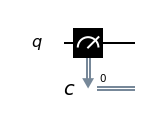

In [3]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1) #make a quantum circuit with a 1 qbit register and 1 classical bit register
measure_z.measure(0,0); #map the 0th qbit to the 0th classical bit
measure_z.draw(output='mpl')


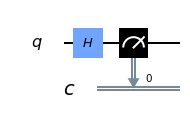

In [4]:
# x measurement of qubit 0 
measure_x = QuantumCircuit(1,1) #make a quantum circuit with a 1 qbit register and 1 classical bit register
measure_x.h(0) #add a hadamrd gate to the 0th qbit
measure_x.measure(0,0); #map the 0th qbit to the 0th classical bit
measure_x.draw(output='mpl')

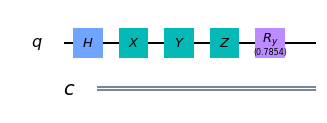

In [87]:
qc = QuantumCircuit(1,1)

qc.h(0) # the hadamard at qbit 0

qc.x(0) # x gate at qbit 0

qc.y(0) # y gate at qbit 0

qc.z(0) # z gate at qbit 0

# for the following, replace theta by any number
theta = 3.14159/4 #pi/4
qc.ry(theta,0); # y axis rotation #add an ry gate at qbit 0

#qc.measure(0,0)
qc.draw(output='mpl')

In [88]:
#print('Results for z measurement:')
#counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
#plot_histogram(counts) #do the simulation by getting the Aer backend end, and plot the histogram results, remember the default shots is 1024

In [89]:
shots = 2**14 # number of samples used for statistics

uncertainty = 0
for measure_circuit in [measure_z, measure_x]:

    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    uncertainty += ( probs['0'] -  probs['1'] )**2

# print the total uncertainty
print('The total uncertainty is',uncertainty )

The total uncertainty is 1.0030852109193802


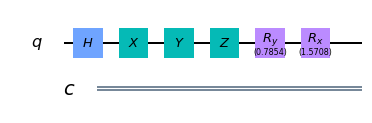

In [90]:
# for the following, replace theta by any number
theta = 3.14159/2
qc.rx(theta,0); # x axis rotation
qc.draw(output='mpl')

In [91]:
# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

In [92]:
shots = 2**14 # number of samples used for statistics

uncertainty = 0
for measure_circuit in [measure_z, measure_x, measure_y]:

    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    uncertainty += ( probs['0'] -  probs['1'] )**2

# print the total uncertainty
print('The total uncertainty is',uncertainty )

The total uncertainty is 1.0104508101940155
